In [48]:
#markowitz portfolio selection 
import pandas as pd
data=pd.read_csv(r"portfolio.csv",";") 
#put your excell with the adj close of last for example 4 years 

In [49]:
data.head()

,Date,Adj Close apple,Adj Close amazon,Adj Close IBM,Adj Close sep 500
0,31/12/2014,101.419060,310.350006,129.285675,2058.899902
1,02/01/2015,100.454300,308.519989,130.591095,2058.199951
2,05/01/2015,97.624336,302.190002,128.536270,2020.579956
3,06/01/2015,97.633545,295.290009,125.764221,2002.609985
4,07/01/2015,99.002556,298.420013,124.942291,2025.900024


In [ ]:
# dataframe is to normalize the data.
#I’m going to use logarithmic returns, since it’s more convenient and it takes care of the normalization for the rest of the project.

In [50]:
import numpy as np
#log_ret=np.log(data/data.shift(1))
#log_ret.head()
data=data.drop(["Date"],axis=1)

print(len(data.columns))
print(data)

4
      Adj Close apple  Adj Close amazon  Adj Close IBM  Adj Close sep 500
0          101.419060        310.350006     129.285675        2058.899902
1          100.454300        308.519989     130.591095        2058.199951
2           97.624336        302.190002     128.536270        2020.579956
3           97.633545        295.290009     125.764221        2002.609985
4           99.002556        298.420013     124.942291        2025.900024
5          102.806480        300.459991     127.657913        2062.139893
6          102.916725        296.929993     128.213913        2044.810059
7          100.380791        291.410004     126.062386        2028.260010
8          101.272049        294.739990     126.360535        2023.030029
9          100.886154        293.269989     125.546654        2011.270020
10          98.148056        286.950012     124.555489        1992.670044
11          97.385445        290.739990     126.626427        2019.420044
12          99.893822        289.440

In [5]:

ret_apple=np.log(data["Adj Close apple"]/data["Adj Close apple"].shift(1))
ret_amazon=np.log(data["Adj Close amazon"]/data["Adj Close amazon"].shift(1))
ret_ibm=np.log(data["Adj Close IBM"]/data["Adj Close IBM"].shift(1))
ret_500=np.log(data["Adj Close sep 500"]/data["Adj Close sep 500"].shift(1))
print("annual return of stock")
print("mean apple",ret_apple.mean()*252)
print("ret_amazon",ret_amazon.mean()*252)
print("ret_ibm",ret_ibm.mean()*252)
print("ret_500",ret_500.mean()*252)


stock=pd.concat([ret_apple,ret_amazon,ret_ibm,ret_500],axis=1)
stock.head()


annual return of stock
mean apple 0.21167349138395364
ret_amazon 0.3575628838632718
ret_ibm 0.005391843638125846
ret_500 0.08973567648292625


,Adj Close apple,Adj Close amazon,Adj Close IBM,Adj Close sep 500
0,NaN,NaN,NaN,NaN
1,-0.009558,-0.005914,0.010047,-0.000340
2,-0.028576,-0.020731,-0.015860,-0.018447
3,0.000094,-0.023098,-0.021802,-0.008933
4,0.013925,0.010544,-0.006557,0.011563


In [43]:
#simulate different combination of sharp ratio 
rf=0.02
np.random.random(900)
num_ports = 30000
#create columns of 0 

all_weights = np.zeros((num_ports, len(stock.columns))) # row, column 
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(4)) #max weight is 4 so max +4 ... -3 short selling
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum((stock.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(stock.cov()*252, weights)))#np dot is matrix product 
    
    # Sharpe Ratio
    sharpe_arr[x] = (ret_arr[x]-rf)/vol_arr[x]

In [44]:
print("max sharpe ratio in the array:" ,sharpe_arr.max())
print("located in index:",sharpe_arr.argmax())

max sharpe ratio in the array: 1.177943603677665
located in index: 2794


In [45]:
# minimum var portfolio
min_sr_vol= vol_arr[vol_arr.argmin()]
ret_mvp = ret_arr[vol_arr.argmin()]
weight_mvp= all_weights[vol_arr.argmin()]
sharpe_mvp=((ret_mvp-rf)/min_sr_vol).max()
print("minimum variance portfolio data")
print("volatility mvp",vol_arr.min()," return",ret_mvp, "weight mvp",weight_mvp,"sharpe mvp",sharpe_mvp )

minimum variance portfolio data
volatility mvp 0.13573022534377457  return 0.09112420355659415 weight mvp [0.02942342 0.00180367 0.03180284 0.93697007] sharpe mvp 0.5240115337350417


In [46]:
max_sr_vol=vol_arr[sharpe_arr.argmax()]
max_sr_ret=ret_arr[sharpe_arr.argmax()]
best_weight=all_weights[sharpe_arr.argmax()]
print("best sharpe ratio ptf")
print("volatility max:",max_sr_vol,"max return:",max_sr_ret, "best weight:",
      best_weight, "best sharpe ratio",sharpe_arr.max())

best sharpe ratio ptf
volatility max: 0.24592238967344826 max return: 0.3096827059169646 best weight: [0.30329564 0.68465739 0.00481429 0.00723267] best sharpe ratio 1.177943603677665


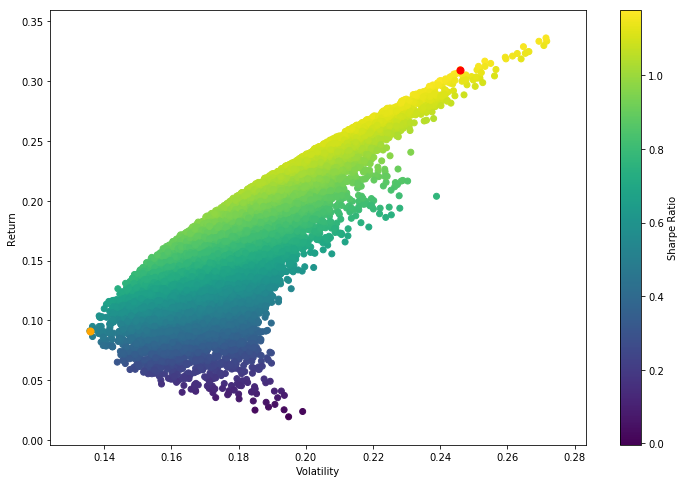

In [47]:
#graph of best sharpe ratio
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50, ) # red dot 
plt.scatter(min_sr_vol, ret_mvp,c='orange', s=50) # blue dot 

plt.show()